In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper # my function that i added

In [2]:
hous_df = pd.read_csv('Ames_Housing_Price_Data.csv', index_col = 0,
                      low_memory=False)
## Lose the phony index column (that supposedly differentiates between kaggle/non-kaggle training data).
# hous_df.drop('Unnamed: 0', axis=1, inplace=True)
hous_df.drop_duplicates(inplace=True)
hous_df.reset_index(drop=True, inplace=True)
## Exclude all 'SaleCondition' other than 'Normal' and 'Partial'
hous_all = hous_df[(hous_df['SaleCondition'] == 'Normal') | 
                   (hous_df['SaleCondition'] == 'Partial')].reset_index(drop=True)
# Perform the split using stratified sampling based on 'Neighborhood'.
hous_trn, hous_tst = helper.stratified_split(hous_all, 'Neighborhood')


The geo test trains are not the same as the other test train. need to fix that.


In [3]:
test = pd.read_csv('test.csv',index_col=0)
train = pd.read_csv('train.csv',index_col=0)




In [4]:
test_geo = pd.read_csv('test_geo.csv',index_col=0)
train_geo = pd.read_csv('train_geo.csv',index_col=0)

In [5]:
hous_tst.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,903401020,1820,184000,50,RL,60.0,9120,Pave,Pave,Reg,...,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal
1,909100080,1296,104000,30,RL,67.0,4853,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
2,531385020,1434,189000,20,RL,65.0,8529,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
3,907130110,1499,187000,60,RL,65.0,12438,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal
4,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal


In [6]:
test.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,903401020,1820,184000,50,RL,60.0,9120,Pave,Pave,Reg,...,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal
1,909100080,1296,104000,30,RL,67.0,4853,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
2,531385020,1434,189000,20,RL,65.0,8529,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
3,907130110,1499,187000,60,RL,65.0,12438,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal
4,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal


In [7]:
test_geo.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr,latitude,longitude
0,527302110,2073,210000,20,RL,85.0,13175,Pave,NaN,Reg,...,MnPrv,NaN,0,2,2010,WD,Normal,3309 CLINTON CT,42.054563,-93.636690
1,902106140,1028,115000,30,RM,56.0,8960,Pave,Grvl,Reg,...,NaN,NaN,0,3,2010,WD,Normal,1012 GRAND AVE,42.031475,-93.620208
2,923400025,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,...,MnPrv,Shed,700,10,2009,WD,Normal,202 KEN MARIL RD,41.986495,-93.609209
3,527359080,1935,197900,60,RL,NaN,12384,Pave,NaN,Reg,...,NaN,NaN,0,11,2007,WD,Normal,2854 MONROE DR,42.049344,-93.636015
4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,...,NaN,NaN,0,4,2010,WD,Normal,3004 NORTHWOOD DR,42.051360,-93.617279


In [8]:
hous_trn.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,905101330,1296,90000,90,RL,72.0,10791,Pave,NaN,Reg,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
1,909451100,1229,137000,160,RM,24.0,1488,Pave,NaN,Reg,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal
2,527451450,948,89000,160,RM,21.0,1680,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
3,903232190,1040,123900,50,RM,52.0,6240,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
4,914452120,912,156000,85,RL,NaN,7540,Pave,NaN,IR1,...,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal


In [9]:
train.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,905101330,1296,90000,90,RL,72.0,10791,Pave,NaN,Reg,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
1,909451100,1229,137000,160,RM,24.0,1488,Pave,NaN,Reg,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal
2,527451450,948,89000,160,RM,21.0,1680,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
3,903232190,1040,123900,50,RM,52.0,6240,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
4,914452120,912,156000,85,RL,NaN,7540,Pave,NaN,IR1,...,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal


In [10]:
housing = pd.read_csv('ames_housing_latlong.csv', index_col = 0,
                      low_memory=False)

housing.drop_duplicates(inplace=True)
housing.reset_index(drop=True, inplace=True)

housing = housing[(housing['SaleCondition'] == 'Normal') | 
                   (housing['SaleCondition'] == 'Partial')].reset_index(drop=True)

train, test = helper.stratified_split(housing,'Neighborhood')

train, mapping_dict = helper.geo_cords_imputing(train)
test = helper.geo_cords_imputing(test,mapping_dict)

In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper

In [12]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [13]:
target = ['SalePrice']
key = ['PID'] 
numeric = ['GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold'
          ] 
## Let's say you wanted to classify 'YearBuilt' (for example) as ordinal. From a math point of view,
## does it make any difference?
numeric_to_categorical = ['MSSubClass','MoSold']

## Had to remove 'MasVnrType','Electrical','RoofMatl', 'Exterior1st','Exterior2nd', 'Utilities'
## because they get dropped later and am running these categorical through
## OneHotEncoder
categorical = ['MSZoning','Street','Alley','LotShape','LandContour','LotConfig',
               'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
               'RoofStyle','Foundation', 'BsmtFinType1','BsmtFinType2','Heating','GarageType',
               'GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition',
               'BedroomAbvGr', 'CentralAir'
              ]
## Moved 'BedroomAbvGr' to categorical for one-hot encoding. Moved 'CentralAir' to categorical because
## although binary was currently encoded as Y/N.
    
cat_ordinal = [
               'OverallQual','OverallCond', # numeric?
               'ExterQual','ExterCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtQual','BsmtCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtExposure', # {'No':1,'Mn':2,'Av':3,'Gd':4}
               'HeatingQC', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtFullBath','BsmtHalfBath', # numeric?
               'FullBath','HalfBath', # numeric?
               'KitchenAbvGr', # numeric?
               'KitchenQual', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'TotRmsAbvGrd', # numeric?
               'Functional', # {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                             #  'Mod':5,'Min2':6,'Min1':7,'Typ':8}
               'Fireplaces', # numeric?
               'FireplaceQu', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'GarageCars', # numeric?
               'GarageQual', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'GarageCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'PoolQC', # {'Fa':1,'TA':2,'Gd':3,'Ex':4}
               'Fence' #{'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
               ]

In [14]:
# converting all similar mappings together
# most popular mapping

## There is some imputing hidden in the convert_cat_ordinal function.

cat_ordinal_features = [
    'GarageQual','GarageCond',
    'FireplaceQu',
    'KitchenQual',
    'ExterQual','ExterCond',
    'BsmtQual','BsmtCond',
    'HeatingQC'
    ]
cat_ordinal_dict = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# now just unique mappings
# BsmtExposure
cat_ordinal_features = [
    'BsmtExposure'
]
cat_ordinal_dict = {'No':1,'Mn':2,'Av':3,'Gd':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Functional
cat_ordinal_features = [
    'Functional'
]
cat_ordinal_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                    'Mod':5,'Min2':6,'Min1':7,'Typ':8}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# PoolQC
cat_ordinal_features = [
    'PoolQC'
]
cat_ordinal_dict = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Fence
cat_ordinal_features = [
    'Fence'
]
cat_ordinal_dict = {'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)

In [15]:
LotFrontage_dict = {'1Fam':0.7139, 'TwnhsE':0.5849, 'Twnhs':0.5227, 'Duplex':0.7725, '2fmCon':0.6922}

In [16]:
train.loc[train['LotFrontage'].isna(), 'LotFrontage'] = train.loc[train['LotFrontage'].isna(), :].apply(
    lambda x: LotFrontage_dict[x['BldgType']]*np.sqrt(x['LotArea']), axis=1
)

In [17]:
## Removed 'LotFrontage' from here. Imputed above. Added Electrical here because there was NA in test.
## Also 'RoofMatl' because of 'Roll' in test.
## Also 'Exterior1st', 'Exterior2nd'
# weirdest nas. lot frontage. probably worth removing
# not dealing with them out of expediance. 
drop_now_but_look_at_later = ['MasVnrArea','GarageYrBlt','MasVnrType', 'Electrical', 'RoofMatl', 
                              'Exterior1st', 'Exterior2nd', 'Utilities']
train.drop(drop_now_but_look_at_later, axis=1,inplace = True)

In [18]:
na_none_features = ['MiscFeature','Alley','BsmtFinType1','BsmtFinType2',
                   'GarageFinish','GarageType']
for na_none_feature in na_none_features:
    train[na_none_feature] = train[na_none_feature].fillna(value = 'None')

In [19]:
## Think there was a typo here.
na_zero_features = ['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for na_zero_feature in na_zero_features:
    train[na_zero_feature] = train[na_zero_feature].fillna(value = 0)

In [20]:
cols_na = train.loc[:,train.isna().any(axis=0)].columns.to_list()
cols_na

['Prop_Addr', 'latitude', 'longitude']

In [21]:
nhds = train.loc[:,['Neighborhood', 'GrLivArea']]
nhds['LogSalePrice'] = np.log(train['SalePrice'])

In [22]:
nhds = nhds.groupby('Neighborhood').agg(
    Sqft_med=pd.NamedAgg('GrLivArea',np.median),
    LogPrice_med=pd.NamedAgg('LogSalePrice',np.median)
).fillna(0)

In [23]:
weights = train.groupby('Neighborhood').count().apply(lambda x: x['PID']/len(train) ,axis=1).to_list()

In [24]:
scaler = StandardScaler()

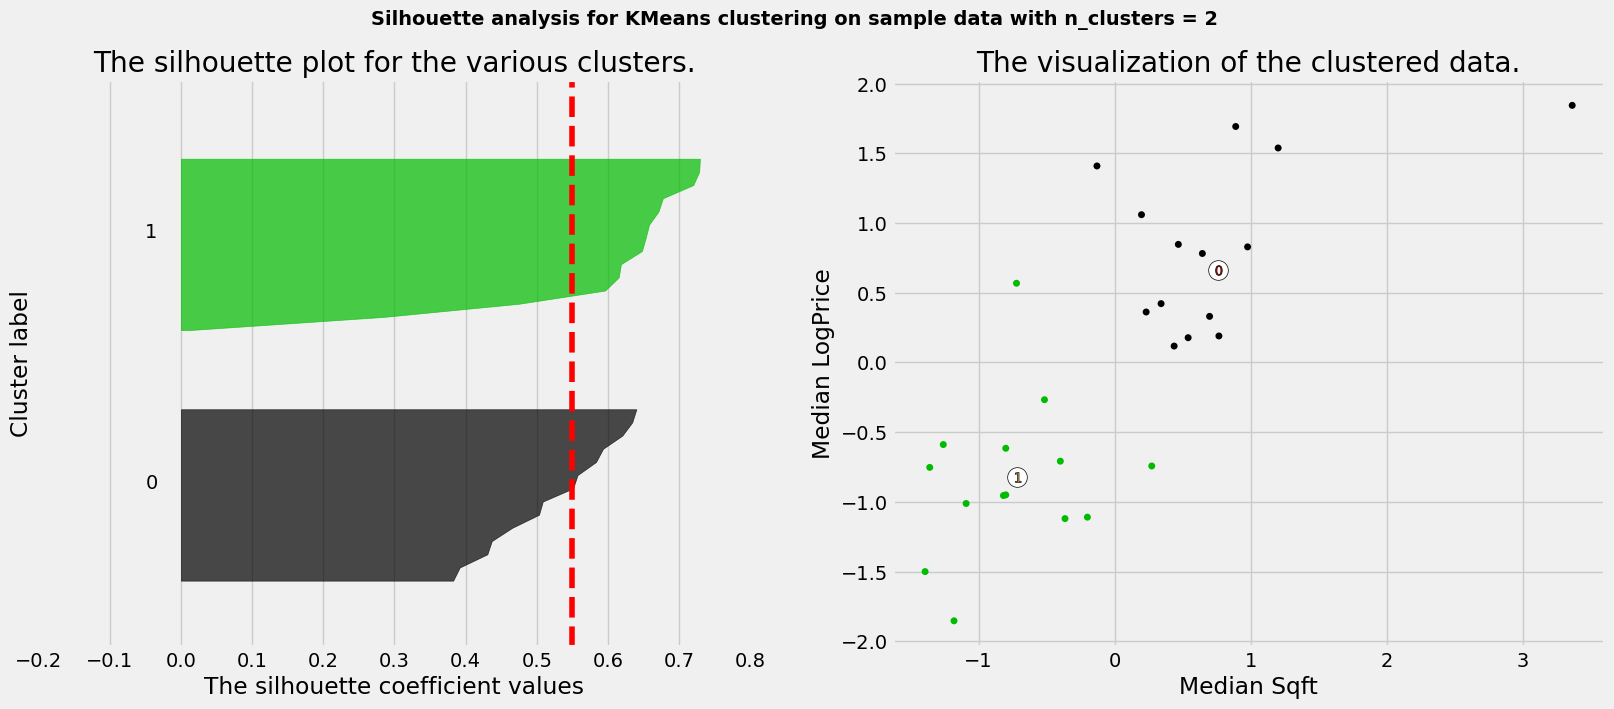

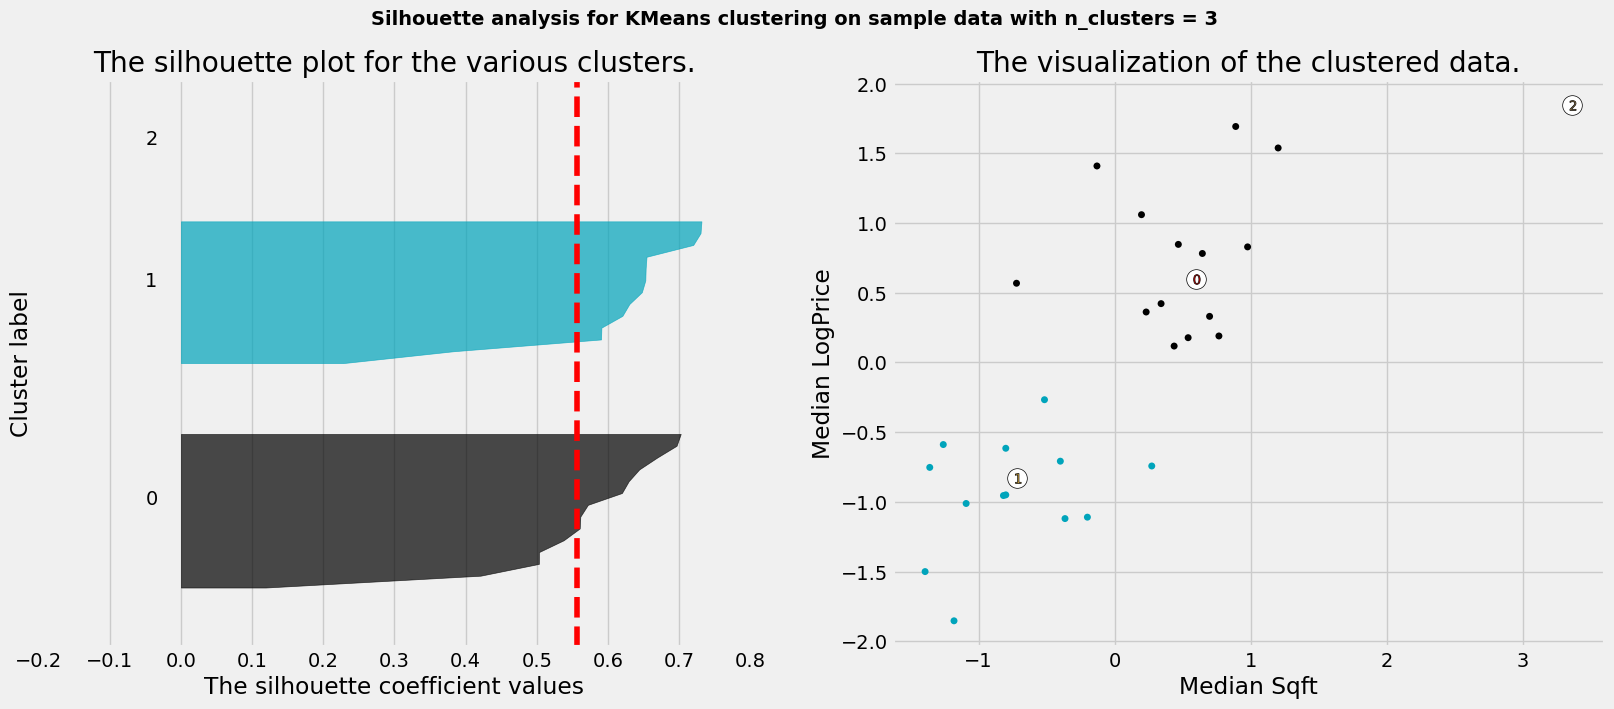

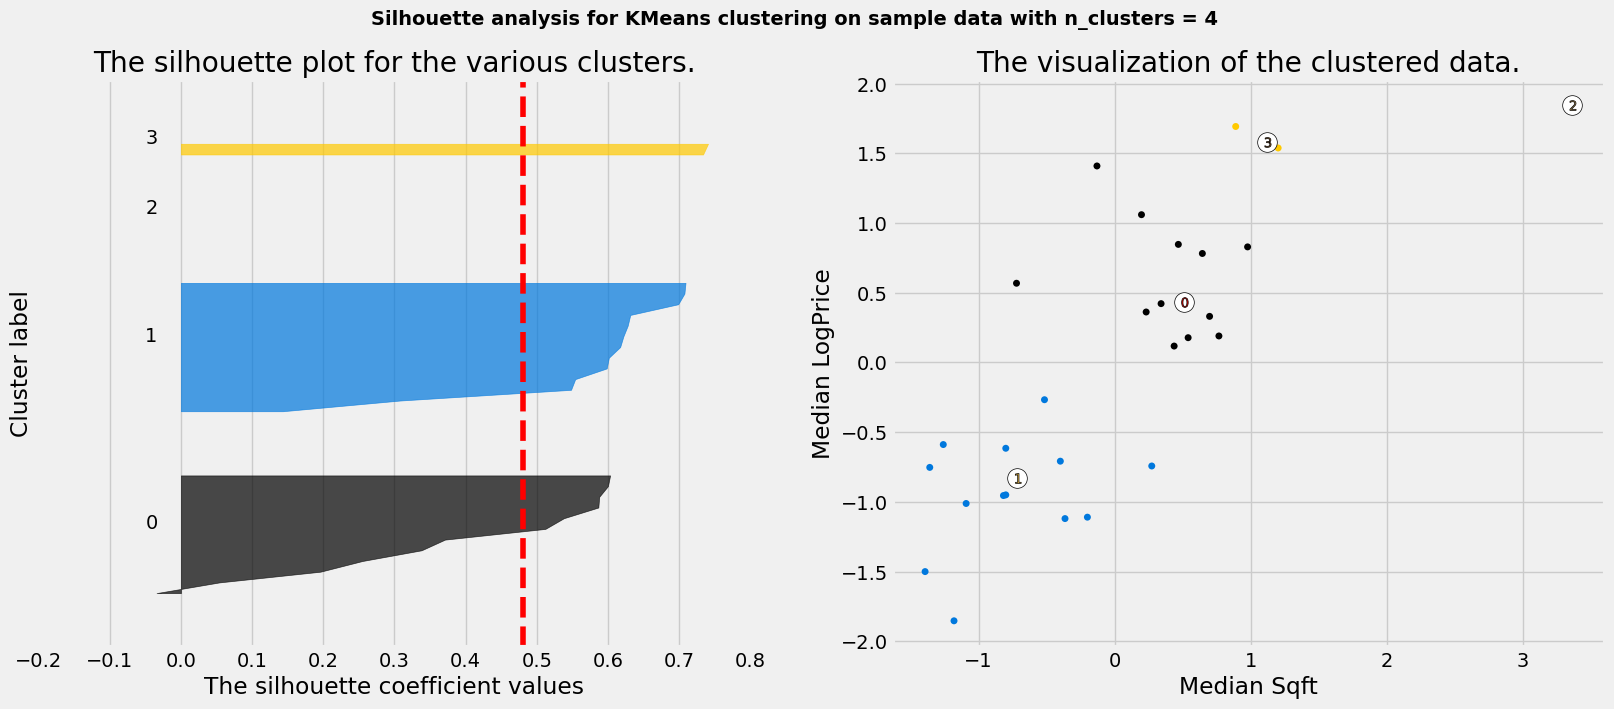

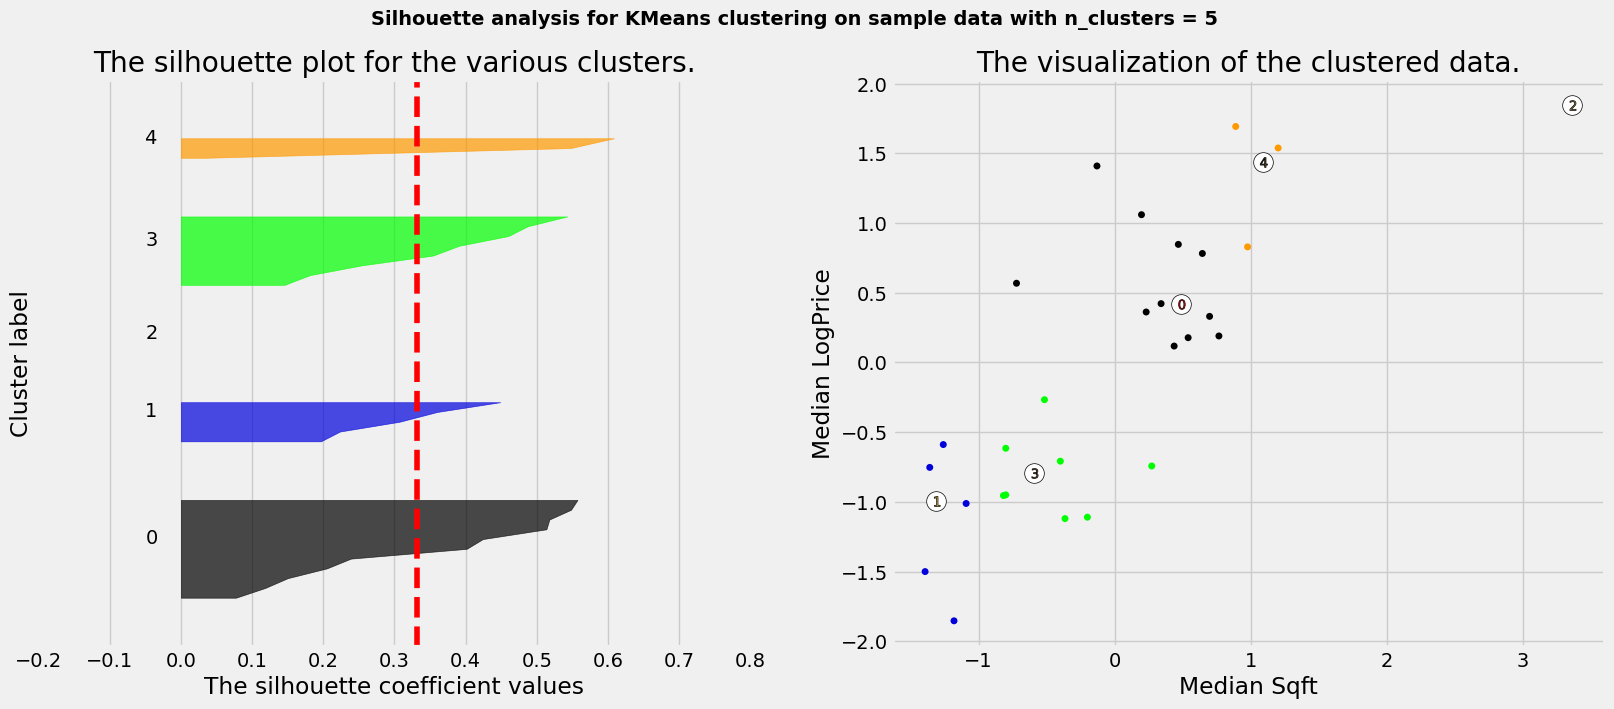

In [25]:
X = nhds
X = scaler.fit_transform(X)

inertias = []

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.2, 0.8])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 5])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X, sample_weight=weights)
    
    inertias.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 5
    
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 5
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=1,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Median Sqft")
    ax2.set_ylabel("Median LogPrice")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
plt.show()

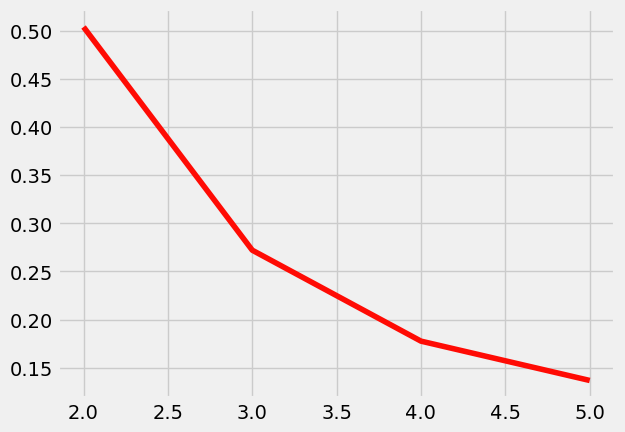

In [26]:
x = range_n_clusters
y = inertias
sns.lineplot(x=x,y=y)
plt.show()